**Elisa Anes Romero - Atividade Transformada Rápida de Fourier (FFT) e efeito do janelamento em sinais senoidais e reais**

###Efeito da resolução (número de bins) de um sinal senoidal
Gere um sinal que consiste na soma de duas senoides de frequências F1 = 600Hz e F2 = 1230 Hz, amostradas com uma frequência de amostragem Fs = 6k Hz. Depois, use a função fft para calcular os coeficientes X(k) da DFT, com N=100. Apresente o gráfico da magnitude da FFT.

O gráfico apresentará dois picos principais sendo um na frequência de 600 Hz e outro na frequência de 1230 Hz.
A resolução da FFT será de 60 Hz, dado que Fs = 6000Hz e N = 100.

Os índices de frequência correspondentes às senoides F1 e F2, respectivamente 10 e 20.5.
k1 = 600/60 = 10
k2 = 1230/60 = 20.5

O índice k2 = 20.5 não é inteiro porque F2 = 1230Hz não é um múltiplo exato de Δf. A energia de F2 será distribuída entre os índices k = 20 e k =21, causando vazamento espectral.

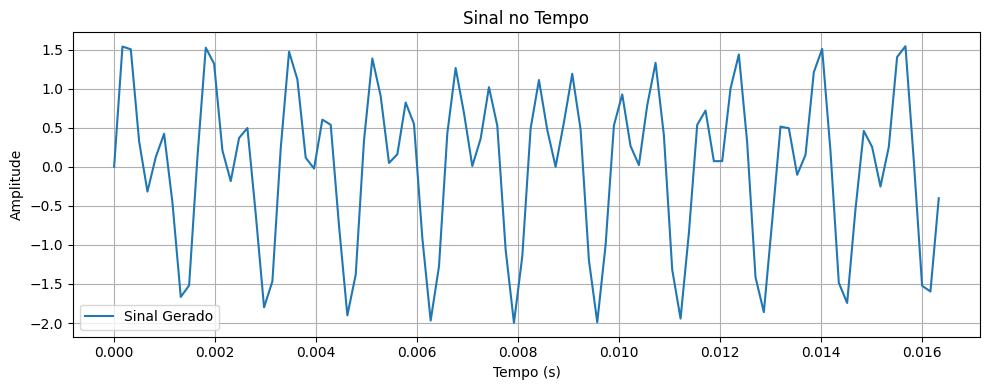

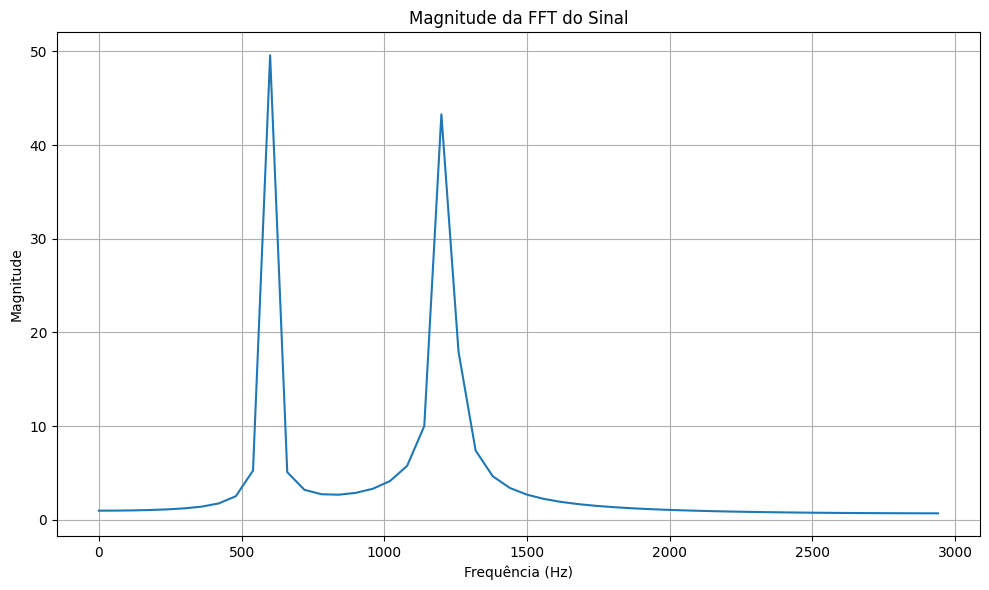

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal
Fs = 6000  # Frequência de amostragem (6 kHz)
F1 = 600   # Frequência da primeira senoide (600 Hz)
F2 = 1230  # Frequência da segunda senoide (1230 Hz)
N = 100    # Número de pontos na DFT
T = 1 / Fs # Período de amostragem
t = np.linspace(0, (N-1)*T, N, endpoint=False)  # Vetor de tempo

# Gerar o sinal como soma das duas senoides
signal = np.sin(2 * np.pi * F1 * t) + np.sin(2 * np.pi * F2 * t)

# Aplicar a FFT
fft_result = np.fft.fft(signal, n=N)
fft_magnitude = np.abs(fft_result)  # Magnitude da FFT

# Eixo de frequências
freqs = np.fft.fftfreq(N, d=T)  # Frequências correspondentes

# Filtrar para exibir apenas frequências positivas
positive_freqs = freqs[:N // 2]
positive_magnitude = fft_magnitude[:N // 2]

# Plotar o sinal no tempo
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Sinal Gerado')
plt.title('Sinal no Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_magnitude)
plt.title('Magnitude da FFT do Sinal')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()


###Por que não encontramos duas linhas simples no gráfico da FFT, mesmo sendo senoides?
Embora a Transformada de Fourier Contínua (TFC) de uma senoide seja uma função delta (picos infinitamente finos em suas frequências), no caso da Transformada de Fourier Discreta (DFT) usada na FFT, existem fatores que impedem que vejamos "duas linhas simples", como a resolução em frequência, pois a DFT calcula os coeficientes para um número finitos de frequências discretas, que são espaçadas pela resolução de 60Hz. O outro fator é que se a frequência da senoide não for múltipla de 60Hz, a energia da senóide será distribuída em vários pontos do espectro, causando o vazamento espectral.

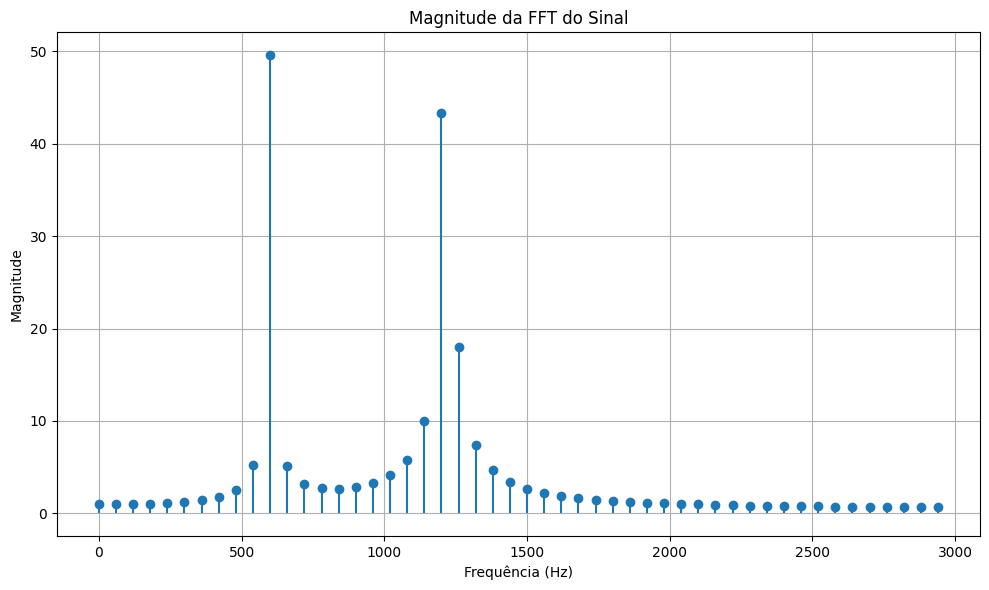

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal
Fs = 6000  # Frequência de amostragem (6 kHz) Fs = 4920
F1 = 600   # Frequência da primeira senoide (600 Hz)
F2 = 1230  # Frequência da segunda senoide (1230 Hz)
N = 100    # Número de pontos na DFT  N = 200
T = 1 / Fs # Período de amostragem
t = np.linspace(0, (N-1)*T, N, endpoint=False)  # Vetor de tempo

# Gerar o sinal como soma das duas senoides
signal = np.sin(2 * np.pi * F1 * t) + np.sin(2 * np.pi * F2 * t)

# Aplicar a FFT
fft_result = np.fft.fft(signal, n=N)
fft_magnitude = np.abs(fft_result)  # Magnitude da FFT

# Eixo de frequências
freqs = np.fft.fftfreq(N, d=T)  # Frequências correspondentes

# Filtrar para exibir apenas frequências positivas
positive_freqs = freqs[:N // 2]
positive_magnitude = fft_magnitude[:N // 2]

# Plotar a magnitude da FFT com stem
plt.figure(figsize=(10, 6))
plt.stem(positive_freqs, positive_magnitude, basefmt=" ")
plt.title('Magnitude da FFT do Sinal')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()

###Análise usando stem em vez de plot:
Utilizando a função stem é possível ver picos mais visíveis, facilitando a identificação das frequências presentes no sinal.

###Por que o espectro da senoide de F2 sofreu espalhamento?
O espectro da senoide de F2 = 1230 Hz sofreu espalhamento porque a frequencia F2 não é múltipla exata da resolução em frequência.
####Vazamento espectral (espalhamento)
O vazamento ocorre porque a DFT assume que o sinal é periodicamente repetido.
Se o número de amostras N não contém um número inteiro de ciclos da senoide de F2, a periodicidade artificial imposta pela DFT causa descontinuidades no sinal.
Essas descontinuidades geram componentes em frequências próximas, espalhando a energia do espectro.
####Fator da resolução em frequência
A atual resolução em frequência é relativamente baixa, fator que auxilia no espalhamento.
A quantidade de amostras é finita em 100, e isso também introduz componentes adicionais no espectro.
Para esses valores de F1 e F2 seria melhor aumentar o números de pontos usados no cálculo da DFT, N = 600, obtendo uma resolução de frequência de 10Hz, diminuindo o espalhamento espectral.

###Aumento de N = 200
Ao aumentar N para 200, a resolução de frequência muda para 30hz, melhorando o espalhamento espectral. Porém vale resaltar que o esforço computacional cresce de forma quadrada ao aumentar o N, dessa forma, quando tínhamos N = 100 eram feitas 10000 operações, agora com N = 200, são feitas 40000.

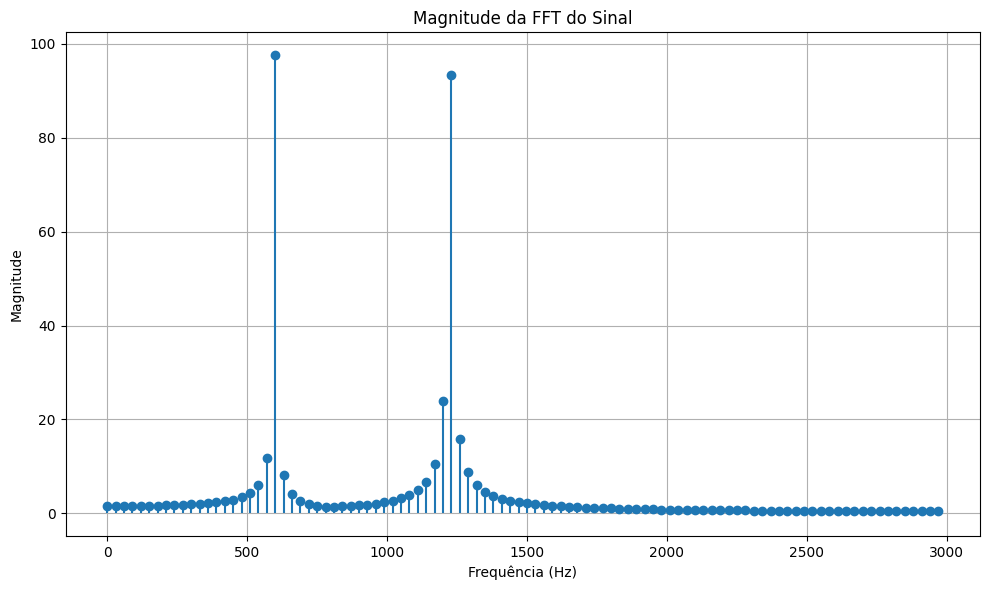

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal
Fs = 6000 # Frequência de amostragem (6 kHz) Fs = 4920
F1 = 600   # Frequência da primeira senoide (600 Hz)
F2 = 1230  # Frequência da segunda senoide (1230 Hz)
N = 200    # Número de pontos na DFT  N = 200
T = 1 / Fs # Período de amostragem
t = np.linspace(0, (N-1)*T, N, endpoint=False)  # Vetor de tempo

# Gerar o sinal como soma das duas senoides
signal = np.sin(2 * np.pi * F1 * t) + np.sin(2 * np.pi * F2 * t)

# Aplicar a FFT
fft_result = np.fft.fft(signal, n=N)
fft_magnitude = np.abs(fft_result)  # Magnitude da FFT

# Eixo de frequências
freqs = np.fft.fftfreq(N, d=T)  # Frequências correspondentes

# Filtrar para exibir apenas frequências positivas
positive_freqs = freqs[:N // 2]
positive_magnitude = fft_magnitude[:N // 2]

# Plotar a magnitude da FFT com stem
plt.figure(figsize=(10, 6))
plt.stem(positive_freqs, positive_magnitude, basefmt=" ")
plt.title('Magnitude da FFT do Sinal')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()


Gere um novo sinal que consiste na soma de duas senoides com frequências F1 e F3 (mantenha a mesma frequência de amostragem Fs). Aplique FFT de 100 e 200 pontos. Você consegue ver os dois componentes de frequência separados usando plot e/ou stem? Por quê?

Ao utilizar plot não é possível ver as duas componentes de frequência, porém utilizando stem e N = 200 é possível ver os dois picos, pois a resolução de 30hz é suficiente para separar F1 e F2.
Com N = 100 a resolução de 60Hz não é suficiente para distinguir F1 e F3, pois a distância entre elas é de 30hz. As duas componentes de frequência aparecerão como um único pico combinado.

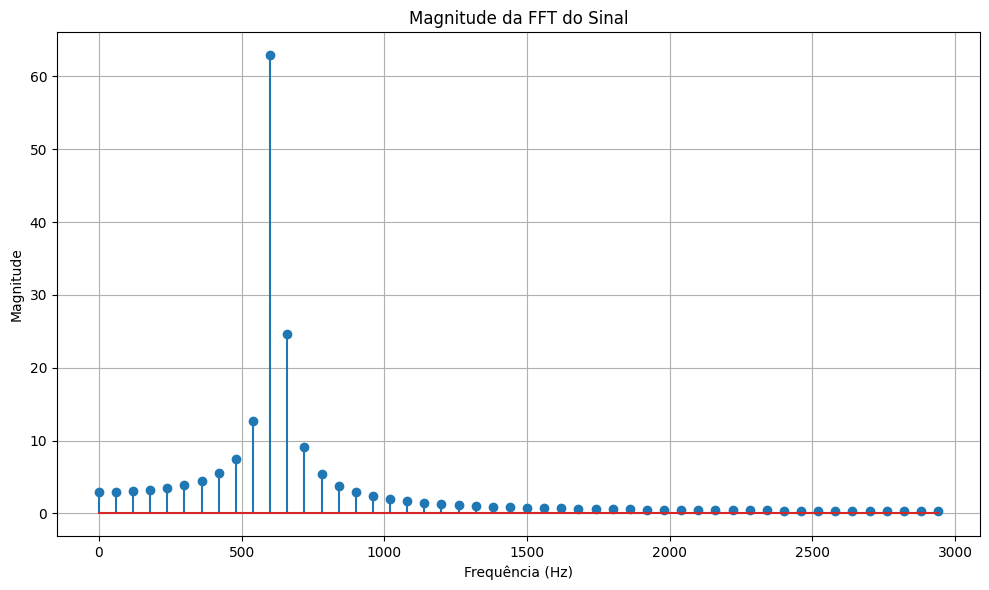

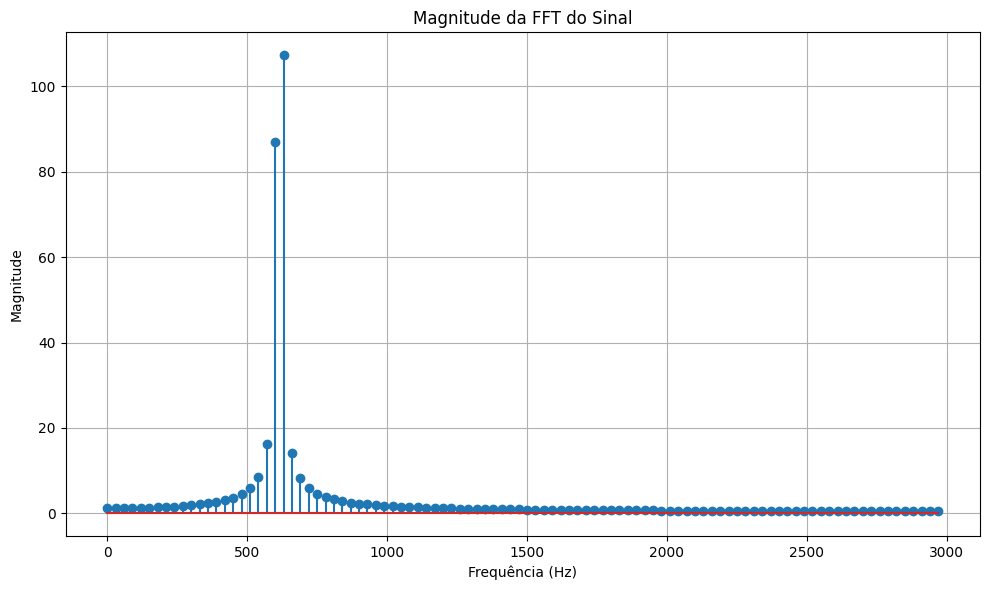

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal
Fs = 6000 # Frequência de amostragem (6 kHz) Fs = 4920
F1 = 600   # Frequência da primeira senoide (600 Hz)
F3 = 630  # Frequência da segunda senoide (1230 Hz)
N = 100    # Número de pontos na DFT  N = 200
T = 1 / Fs # Período de amostragem
t = np.linspace(0, (N-1)*T, N, endpoint=False)  # Vetor de tempo

# Gerar o sinal como soma das duas senoides
signal = np.sin(2 * np.pi * F1 * t) + np.sin(2 * np.pi * F3 * t)

# Aplicar a FFT
fft_result = np.fft.fft(signal, n=N)
fft_magnitude = np.abs(fft_result)  # Magnitude da FFT

# Eixo de frequências
freqs = np.fft.fftfreq(N, d=T)  # Frequências correspondentes

# Filtrar para exibir apenas frequências positivas
positive_freqs = freqs[:N // 2]
positive_magnitude = fft_magnitude[:N // 2]

# Plotar a magnitude da FFT com stem
plt.figure(figsize=(10, 6))
plt.stem(positive_freqs, positive_magnitude)
plt.title('Magnitude da FFT do Sinal')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()


# Parâmetros do sinal
Fs = 6000 # Frequência de amostragem (6 kHz) Fs = 4920
F1 = 600   # Frequência da primeira senoide (600 Hz)
F3 = 630  # Frequência da segunda senoide (1230 Hz)
N = 200    # Número de pontos na DFT  N = 200
T = 1 / Fs # Período de amostragem
t = np.linspace(0, (N-1)*T, N, endpoint=False)  # Vetor de tempo

# Gerar o sinal como soma das duas senoides
signal = np.sin(2 * np.pi * F1 * t) + np.sin(2 * np.pi * F3 * t)
# Aplicar a FFT
fft_result = np.fft.fft(signal, n=N)
fft_magnitude = np.abs(fft_result)  # Magnitude da FFT

# Eixo de frequências
freqs = np.fft.fftfreq(N, d=T)  # Frequências correspondentes

# Filtrar para exibir apenas frequências positivas
positive_freqs = freqs[:N // 2]
positive_magnitude = fft_magnitude[:N // 2]

# Plotar a magnitude da FFT com stem
plt.figure(figsize=(10, 6))
plt.stem(positive_freqs, positive_magnitude)
plt.title('Magnitude da FFT do Sinal')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()


Modifique o exercício anterior adicionando a aplicação de janelamento (multiplicação) nas senoides, a fim de minimizar o vazamento espectral (spectral leakage) observado anteriormente. Aplique 5 diferentes janelas (inclusive janelas de Kaiser com diferentes valores de beta). Observe as diferenças quanto ao vazamento espectral e à largura do lóbulo principal. Mostre os gráficos e comente os resultados. Ver Understanding FFTs and Windowing, material da National Instruments. Ver também: https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows

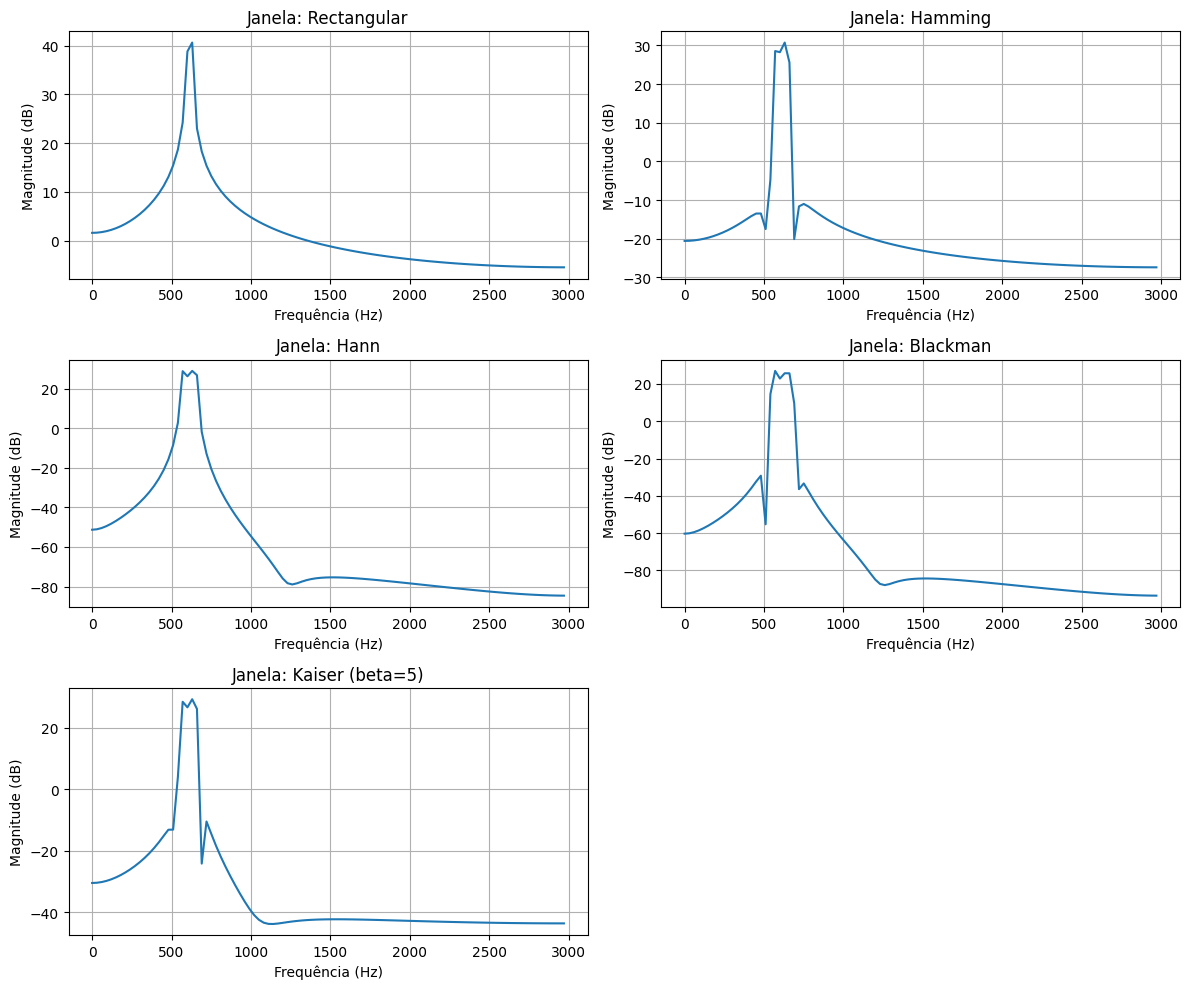

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows

# Parâmetros do sinal
Fs = 6000  # Frequência de amostragem
F1 = 600   # Frequência da primeira senoide
F3 = 630   # Frequência da segunda senoide
N = 200    # Número de pontos na DFT

# Gerar o sinal composto
T = 1 / Fs  # Período de amostragem
t = np.linspace(0, (N-1)*T, N, endpoint=False)  # Vetor de tempo
signal = np.sin(2 * np.pi * F1 * t) + np.sin(2 * np.pi * F3 * t)  # Sinal composto

# Definir diferentes janelas
window_types = {
    "Rectangular": windows.boxcar(N),
    "Hamming": windows.hamming(N),
    "Hann": windows.hann(N),
    "Blackman": windows.blackman(N),
    "Kaiser (beta=5)": windows.kaiser(N, beta=6)
}

# Aplicar janelas, calcular FFT e plotar
plt.figure(figsize=(12, 10))
for i, (name, window) in enumerate(window_types.items()):
    # Aplicar a janela ao sinal
    windowed_signal = signal * window

    # Calcular FFT
    fft_result = np.fft.fft(windowed_signal, n=N)
    fft_magnitude = np.abs(fft_result)[:N//2]  # Apenas parte positiva
    freqs = np.fft.fftfreq(N, d=1/Fs)[:N//2]  # Frequências correspondentes

    # Plotar a magnitude da FFT
    plt.subplot(3, 2, i+1)
    plt.plot(freqs, 20 * np.log10(fft_magnitude), label=name)
    plt.title(f"Janela: {name}")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.tight_layout()

plt.show()


###Tipos de Janela
Diferentes janelas possuem diferentes efeitos no espectro. Algumas favorecem resolução em frequência, enquanto outras reduzem vazamento espectral.

###Janela Retangular
A janela retangular é a mais simples e direta: ela simplesmente mantém o sinal inalterado dentro do intervalo de análise e corta abruptamente fora dele. Isso equivale a uma função "liga/desliga", onde todos os pontos dentro da janela possuem o mesmo peso.
A vantagem é que possui alta resolução em frequência e lóbulo principal estreito, e a desvantagem é que gera alto vazamento espectral devido às descontinuidades abruptas na borda do sinal, resultando em lóbulos laterais altos.
As aplicações são feitas para sinais que já são bem separados em frequência, onde o vazamento não será um problema significativo e a resolução espectral é o aspecto mais importante. Geralmente essa janela é aplicada em sinais de radar com pulsos bem definidos.


###Janela Hamming
A janela Hamming foi projetada para reduzir o vazamento espectral sem expandir demasiadamente o lóbulo principal. Diferente da retangular, ela suaviza a transição nas bordas do sinal, diminuindo as descontinuidades que causam espalhamento de energia para outras frequências.
A vantagem é que possui boa atenuação dos lóbulos laterais (~41 dB abaixo do lóbulo principal), reduzindo significativamente o vazamento espectral. Já a desvantagem é que o lóbulo principal é um pouco mais largo que na janela retangular, reduzindo ligeiramente a resolução em frequência.
Essa janela é geralmente utlizada em sistemas de áudio e telecomunicações, onde a presença de frequências indesejadas pode interferir na qualidade do sinal.

###Janela Hann
A janela Hann, é bastante semelhante à Hamming, mas oferece uma atenuação um pouco melhor dos lóbulos laterais. Seu formato suaviza ainda mais as bordas, reduzindo significativamente a energia espalhada no espectro. A vantagem dessa janela é uma melhor redução do vazamento espectral do que a Hamming, com lóbulos laterais 44 dB abaixo do lóbulo principal. A desvantagem é que o lóbulo principal é um pouco mais largo que o da Hamming, reduzindo levemente a capacidade de distinguir frequências muito próximas. É muito utilizada para análise de sinais de áudio e instrumentação científica, especialmente quando há interesse em minimizar artefatos causados por descontinuidades espectrais.

###Janela Blackman
A janela Blackman leva a suavização ao extremo, projetada especificamente para minimizar o vazamento espectral o máximo possível. Diferente da Hamming e da Hann, ela tem dois coeficientes adicionais que a tornam mais eficiente na redução dos lóbulos laterais. A vantagem é que os lóbulos laterais são atenuados em aproximadamente 74 dB, eliminando quase todo o vazamento espectral, porém o lóbulo principal é bastante largo, reduzindo a resolução em frequência.
Comumente aplicada no processamento de sinais de baixa frequência (imagens), onde a prioridade é a máxima redução do vazamento espectral, mesmo que isso comprometa a resolução e a capacidade de distinguir frequências próximas.







##Janelas Kaiser com Betas diferentes:

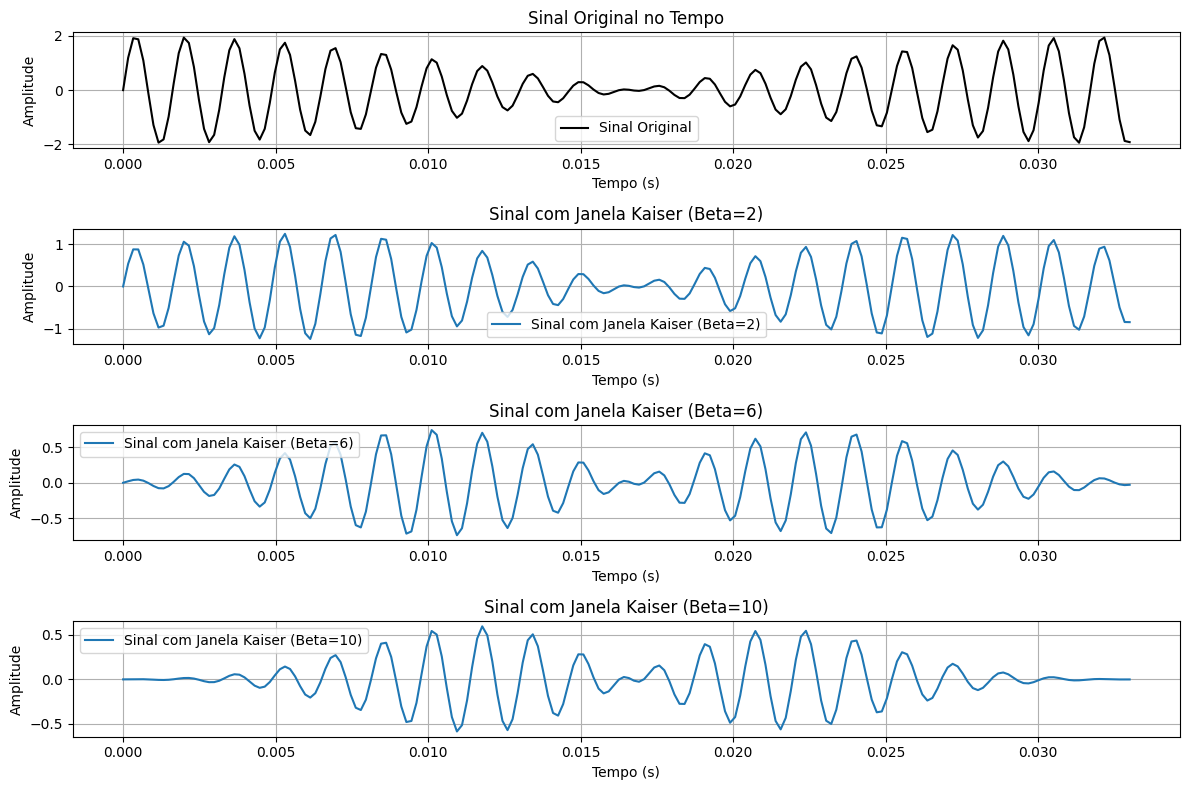

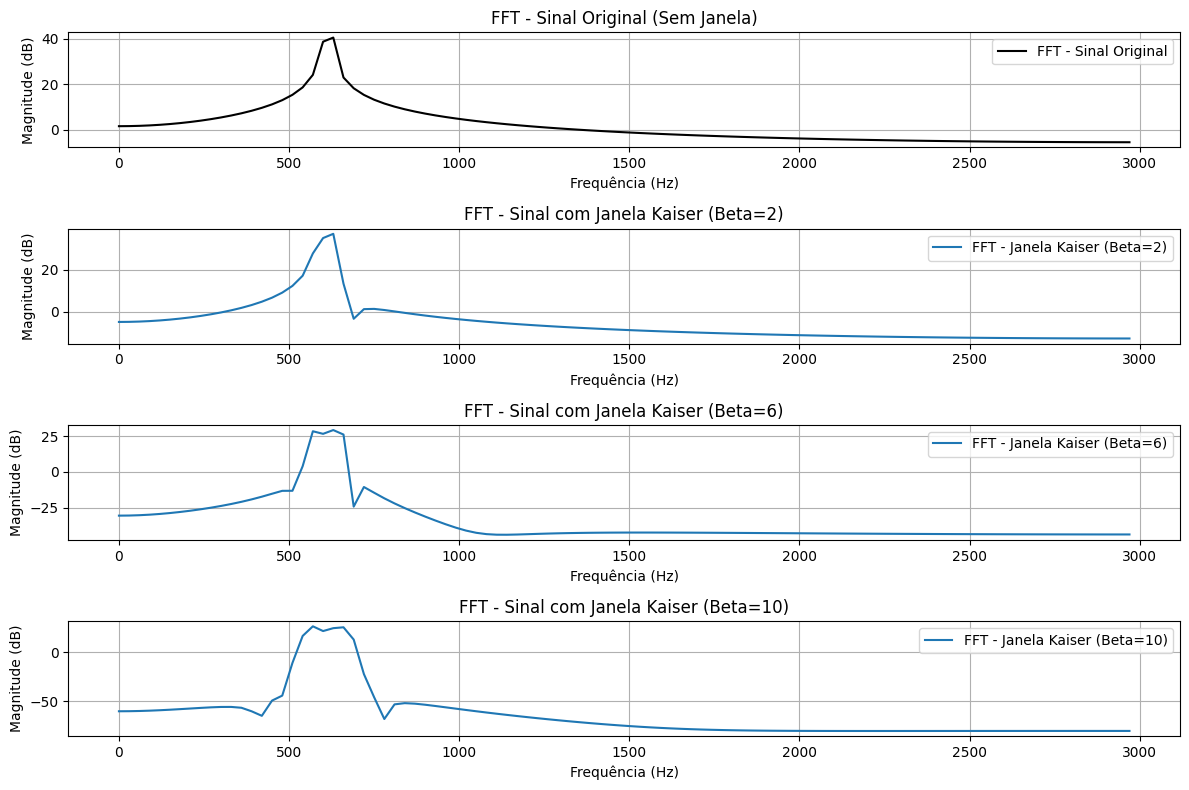

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows

# Parâmetros do sinal
Fs = 6000  # Frequência de amostragem
F1 = 600   # Frequência da primeira senoide
F3 = 630   # Frequência da segunda senoide
N = 200    # Número de pontos na DFT

# Gerar o sinal composto
T = 1 / Fs  # Período de amostragem
t = np.linspace(0, (N-1)*T, N, endpoint=False)  # Vetor de tempo
signal = np.sin(2 * np.pi * F1 * t) + np.sin(2 * np.pi * F3 * t)  # Sinal composto

# Definir diferentes valores de beta para a Janela Kaiser
betas = [2, 6, 10]  # Beta define a forma da janela

# Criar a figura para os gráficos do sinal no tempo
plt.figure(figsize=(12, 8))

# Plotar o sinal original sem janela
plt.subplot(len(betas) + 1, 1, 1)
plt.plot(t, signal, label="Sinal Original", color="black")
plt.title("Sinal Original no Tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Aplicar a Janela Kaiser e plotar os sinais modificados
signals_kaiser = {}
for i, beta in enumerate(betas):
    kaiser_window = windows.kaiser(N, beta)  # Criar a Janela Kaiser
    signal_kaiser = signal * kaiser_window  # Aplicar ao sinal

    # Armazenar o sinal modificado
    signals_kaiser[beta] = signal_kaiser

    plt.subplot(len(betas) + 1, 1, i + 2)
    plt.plot(t, signal_kaiser, label=f"Sinal com Janela Kaiser (Beta={beta})")
    plt.title(f"Sinal com Janela Kaiser (Beta={beta})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Criar a figura para os gráficos da FFT
plt.figure(figsize=(12, 8))

# Plotar a FFT do sinal original
fft_original = np.fft.fft(signal, n=N)
fft_magnitude_original = np.abs(fft_original)[:N//2]
freqs = np.fft.fftfreq(N, d=1/Fs)[:N//2]

plt.subplot(len(betas) + 1, 1, 1)
plt.plot(freqs, 20 * np.log10(fft_magnitude_original), label="FFT - Sinal Original", color="black")
plt.title("FFT - Sinal Original (Sem Janela)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid()

# Aplicar FFT e plotar para cada Janela Kaiser
for i, beta in enumerate(betas):
    signal_kaiser = signals_kaiser[beta]  # Recuperar sinal modificado
    fft_kaiser = np.fft.fft(signal_kaiser, n=N)
    fft_magnitude_kaiser = np.abs(fft_kaiser)[:N//2]

    plt.subplot(len(betas) + 1, 1, i + 2)
    plt.plot(freqs, 20 * np.log10(fft_magnitude_kaiser), label=f"FFT - Janela Kaiser (Beta={beta})")
    plt.title(f"FFT - Sinal com Janela Kaiser (Beta={beta})")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


##Efeito do Beta na janela Kaiser

Sem o uso de janelamento, o vazamento espectral é significativo, pois a descontinuidade nas bordas do sinal gera artefatos no domínio da frequência. Isso ocorre porque a DFT assume que o sinal é periódico, e quando um sinal não termina exatamente no final da janela de análise, ele cria descontinuidades que espalham energia para frequências indesejadas.

A Janela Kaiser se destaca por sua flexibilidade: ao ajustar o parâmetro Beta, é possível controlar diretamente o compromisso entre resolução espectral e redução do vazamento. O aumento de Beta reduz os lóbulos laterais, minimizando a dispersão de energia em frequências indesejadas. No entanto, essa melhoria na atenuação dos lóbulos laterais vem ao custo do alargamento do lóbulo principal, o que reduz a capacidade de distinguir frequências próximas.

Se o objetivo for alta resolução em frequência, valores menores de Beta são preferíveis, pois mantêm o lóbulo principal estreito, permitindo separar melhor frequências próximas. Já se a prioridade for reduzir o vazamento espectral, valores maiores de Beta são indicados, pois suavizam as descontinuidades e reduzem a interferência de frequências não desejadas.

A grande vantagem da Janela Kaiser sobre outras janelas populares (como Hamming, Hann e Blackman) é sua parametrização adaptável, permitindo que seja ajustada de acordo com as necessidades da aplicação. Essa característica faz com que seja amplamente utilizada em áreas como processamento de sinais biomédicos (ECG, EEG), radar, sonar, telecomunicações e análise espectral de sinais acústicos.

Portanto, a escolha do Beta ideal dependerá da aplicação: se a separação de frequências próximas for essencial, um Beta baixo deve ser usado. Por outro lado, para eliminar ao máximo o vazamento espectral e obter um espectro mais "limpo", um Beta alto será mais adequado.

##3)
Os arquivos de áudio (formato wave) em anexo (piano e trumpet G4) contem a mesma nota musical executada em 2 diferentes instrumentos de orquestra. Aplique a função fft nos sinais fornecidos e sugira um valor de N mínimo necessário para realizar uma análise satisfatória dos sinal (por exemplo, para que seja possível identificar as frequências fundamental e as harmônicas dos sinais).


Após o processamento do arquivo de som espera-se encontar uma frequência fundamental de 392 Hz.

G4 = Nota Sol na quarta oitava

Frequência fundamental: ≈ 392 Hz

###Primeiro passo:
É preciso verificar a frequência de amostragem, que indica quantas vezes por segundo o sinal de áudio foi gravado.
Depois de rodar o código encontra-se uma fs de 11.025 Hz para ambos os áudios. Então cada segundo de gravação foi dividido em 11.025 amostras discretas.

É importante saber a fs para aplicar o teorema de Nyquist:
Segundo o teorema de Nyquist, a maior frequência que pode-se analisar sem aliasing é de fs/2 , neste caso 5512,5 Hz.
Isso indica que somente frequências até 5512,5 hz são confiáveis na FFT, caso existir frequências acima disso elas estarão distorcidas.

###Próximo passo:
Realizar a FFT para verificar quais frequências estão presentes no som.

Para isso é preciso definir o N, esse valor é de suma importância pois ele define a resolução de frequência:

delta_f = fs/N

para N = 4096

delta_f = 2.69 Hz

Isso significa que a FFT conseguirá separar tons que estejam pelo menos a 2.69 Hz de distância.

###Aplicação da janela Hamming:

A Janela de Hamming é a melhor escolha para este caso porque oferece um bom equilíbrio entre resolução espectral e redução do vazamento. Como estamos analisando sinais de áudio, queremos minimizar o espalhamento das frequências sem perder muita precisão na identificação da fundamental e das harmônicas. A Hamming tem uma atenuação moderada nos lóbulos laterais, reduzindo artefatos indesejados no espectro, enquanto mantém uma resolução de frequência aceitável, tornando a análise da FFT mais confiável.


🎵 Frequência de amostragem:
  - Piano: 11025 Hz
  - Trompete: 11025 Hz



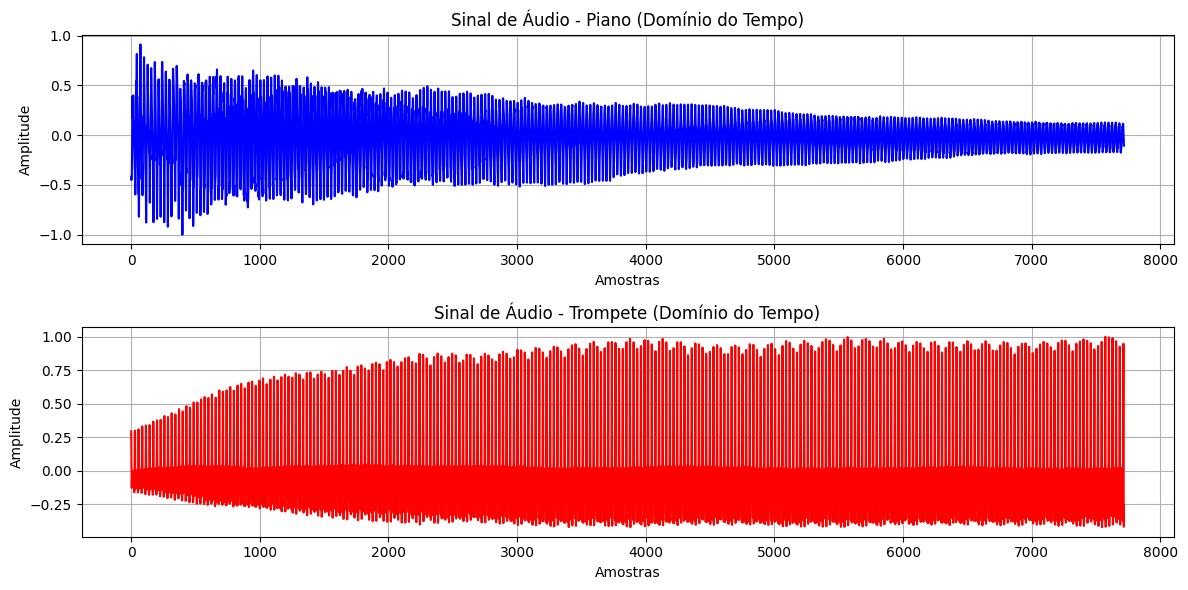


🔍 Analisando FFT com N = 2048


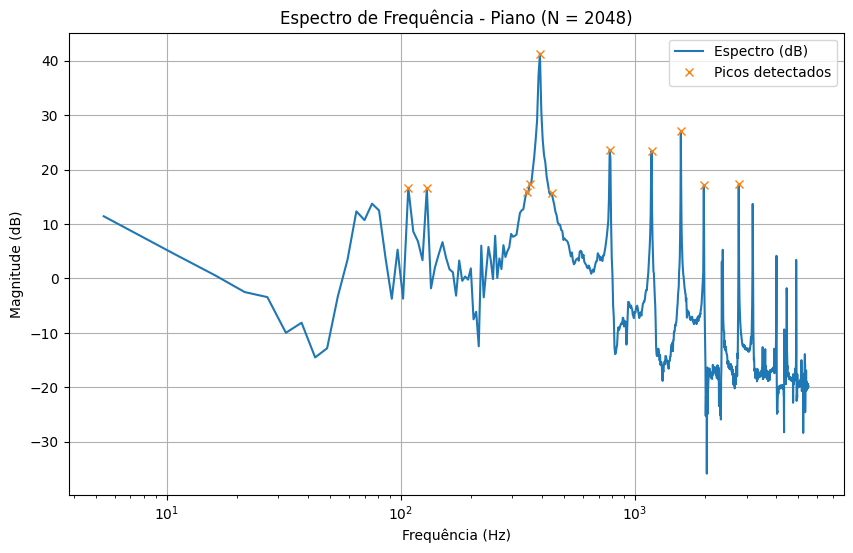


🎶 Piano 🎶
  - Frequência Fundamental Estimada: 107.67 Hz
  - Harmônicas Identificadas: [ 107.66601562  129.19921875  344.53125     355.29785156  392.98095703
  441.43066406  780.57861328 1178.94287109 1571.92382812 1970.28808594
 2777.78320312]



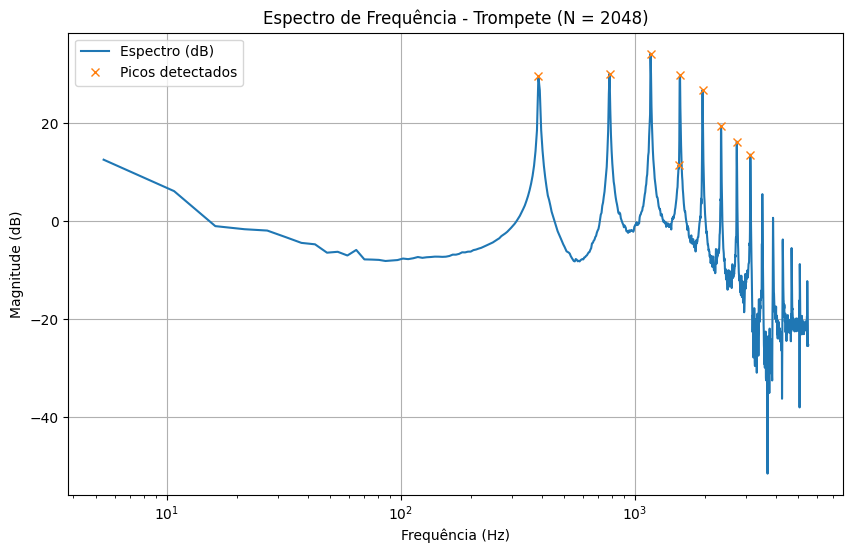


🎶 Trompete 🎶
  - Frequência Fundamental Estimada: 387.60 Hz
  - Harmônicas Identificadas: [ 387.59765625  780.57861328 1168.17626953 1539.62402344 1561.15722656
 1948.75488281 2336.35253906 2729.33349609 3116.93115234]


🔍 Analisando FFT com N = 4096


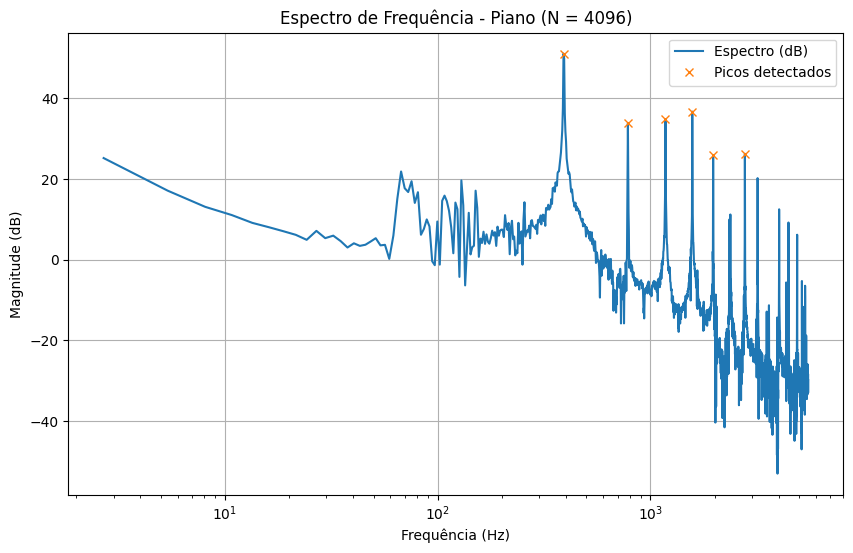


🎶 Piano 🎶
  - Frequência Fundamental Estimada: 390.29 Hz
  - Harmônicas Identificadas: [ 390.28930664  783.27026367 1176.2512207  1571.92382812 1970.28808594
 2777.78320312]



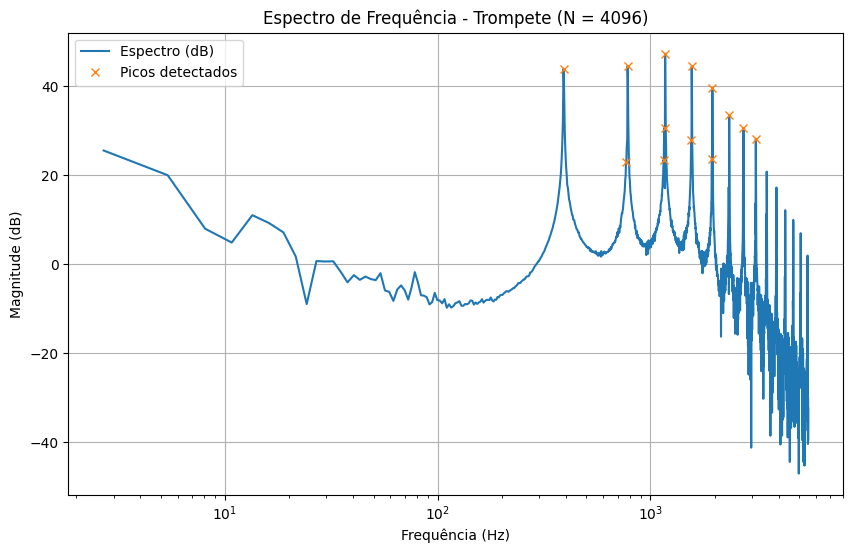


🎶 Trompete 🎶
  - Frequência Fundamental Estimada: 390.29 Hz
  - Harmônicas Identificadas: [ 390.28930664  767.12036133  780.57861328 1152.02636719 1165.48461914
 1170.86791992 1555.77392578 1563.84887695 1943.37158203 1954.13818359
 2344.42749023 2734.71679688 3125.00610352]


🔍 Analisando FFT com N = 8192


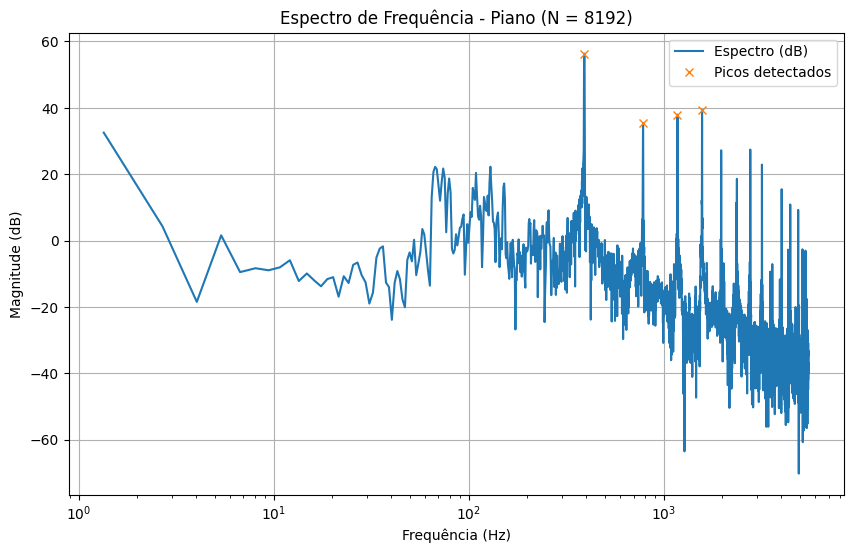


🎶 Piano 🎶
  - Frequência Fundamental Estimada: 391.64 Hz
  - Harmônicas Identificadas: [ 391.63513184  783.27026367 1176.2512207  1571.92382812]



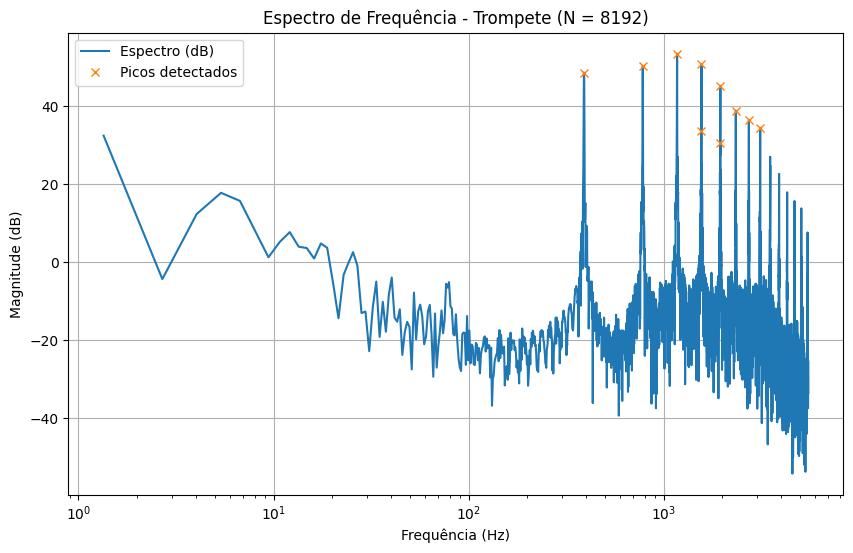


🎶 Trompete 🎶
  - Frequência Fundamental Estimada: 390.29 Hz
  - Harmônicas Identificadas: [ 390.28930664  781.92443848 1172.21374512 1558.46557617 1563.84887695
 1948.75488281 1954.13818359 2345.77331543 2736.06262207 3127.69775391]



In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks, windows

def encontrar_inicio_sinal(dados):
    """
    Detecta automaticamente o início do som, ajustando o limite conforme o tipo de dados.
    """
    if np.max(np.abs(dados)) <= 1:
        limite = 0.01  # Para áudio normalizado (-1 a 1)
    else:
        limite = 1000  # Para áudio em int16 (-32768 a 32767)

    # Percorre o sinal e encontra o primeiro valor acima do limite
    for i in range(len(dados)):
        if abs(dados[i]) > limite:
            return i
    return 0


# Função para processar o áudio (detecção do início + normalização)
def preparar_audio(arquivo, duracao=0.7):
    fs, dados = wavfile.read(arquivo)

    # Se for estéreo, converte para mono
    if len(dados.shape) > 1:
        dados = dados[:, 0]

    # Detectar início do áudio
    inicio = encontrar_inicio_sinal(dados)

    # Definir trecho de análise
    fim = inicio + int(duracao * fs)
    dados = dados[inicio:fim]

    # Normalizar o sinal
    dados = dados / np.max(np.abs(dados))

    return fs, dados

# Função para calcular a FFT e identificar picos espectrais
def calcular_espectro(sinal, taxa_amostragem, N_fft, nome_instrumento):
    # Aplicar uma janela para minimizar vazamento espectral
    janela = windows.hamming(len(sinal))
    sinal_ajustado = sinal * janela

    # Calcular a FFT
    espectro = fft(sinal_ajustado, n=N_fft)
    frequencias = np.fft.fftfreq(N_fft, 1 / taxa_amostragem)

    # Considerar apenas a metade positiva do espectro
    mascara = frequencias > 0
    frequencias = frequencias[mascara]
    espectro = np.abs(espectro[mascara])

    # Detectar picos no espectro
    picos, _ = find_peaks(espectro, height=np.max(espectro) * 0.05)
    freq_fundamental = frequencias[picos[0]] if len(picos) > 0 else None

    # Plotar o espectro de frequência
    plt.figure(figsize=(10, 6))
    plt.plot(frequencias, 20 * np.log10(espectro), label='Espectro (dB)')
    if len(picos) > 0:
        plt.plot(frequencias[picos], 20 * np.log10(espectro[picos]), "x", label='Picos detectados')
    plt.title(f"Espectro de Frequência - {nome_instrumento} (N = {N_fft})")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.xscale('log')
    plt.grid()
    plt.legend()
    plt.show()

    # Exibir os resultados de frequência
    if freq_fundamental:
        print(f"\n🎶 {nome_instrumento} 🎶")
        print(f"  - Frequência Fundamental Estimada: {freq_fundamental:.2f} Hz")
        print(f"  - Harmônicas Identificadas: {frequencias[picos]}\n")
    else:
        print(f" {nome_instrumento}: Nenhuma frequência fundamental detectada.")

# Carregar e processar os áudios
fs_piano, sinal_piano = preparar_audio("piano-G4.wav")
fs_trumpet, sinal_trumpet = preparar_audio("trumpet-G4.wav")

# Exibir a taxa de amostragem
print("🎵 Frequência de amostragem:")
print(f"  - Piano: {fs_piano} Hz")
print(f"  - Trompete: {fs_trumpet} Hz\n")

# Plotar os sinais no tempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(sinal_piano, color="blue")
plt.title("Sinal de Áudio - Piano (Domínio do Tempo)")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(sinal_trumpet, color="red")
plt.title("Sinal de Áudio - Trompete (Domínio do Tempo)")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

# Testar FFT com diferentes valores de N para ver o impacto na resolução espectral
valores_N = [2048, 4096, 8192]
for N in valores_N:
    print(f"\n🔍 Analisando FFT com N = {N}")
    calcular_espectro(sinal_piano, fs_piano, N, "Piano")
    calcular_espectro(sinal_trumpet, fs_trumpet, N, "Trompete")


##Conclusão sobre a Escolha do Número de Pontos na FFT

A análise dos resultados para diferentes valores de N na FFT mostrou que a escolha do tamanho da transformada impacta diretamente a precisão da identificação das frequências fundamentais e harmônicas nos sinais de piano e trompete.

Para N=2048, observamos que a frequência fundamental do piano foi detectada incorretamente como 107.67 Hz, indicando que a resolução espectral de 5.38 Hz foi insuficiente para separar corretamente os componentes do sinal. Além disso, essa configuração apresentou muitas frequências adicionais que podem ser artefatos, comprometendo a qualidade da análise.

Com N=4096, a resolução espectral melhorou para 2.69 Hz, permitindo uma identificação correta das frequências fundamentais (~390 Hz para ambos os instrumentos) e fornecendo um conjunto mais coerente de harmônicas. Além disso, essa configuração manteve um equilíbrio adequado entre precisão e custo computacional.

Por outro lado, ao utilizar N=8192, a resolução espectral aumentou ainda mais para 1.34 Hz, oferecendo maior precisão. No entanto, notamos que essa configuração pode ter suprimido algumas harmônicas mais fracas, possivelmente perdendo informações relevantes para a caracterização do timbre dos instrumentos.

Portanto, considerando a precisão da detecção das frequências fundamentais, a quantidade de harmônicas corretamente identificadas e o custo computacional, N=4096 mostrou-se a melhor escolha. Esse valor fornece suficiente resolução espectral para distinguir os componentes do sinal sem gerar um processamento excessivo ou comprometer a análise com artefatos.

